# ANN

#### Perceptron Convergencw Theorem

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [6]:
iris=load_iris(as_frame=True)
X=iris.data[['petal length (cm)', 'petal width (cm)']].values
y=(iris.target == 0)

In [8]:
per_clf=Perceptron(random_state=42)
per_clf.fit(X,y)

Perceptron(random_state=42)

In [12]:
X_new = [[2,0.5],[3,1]]
y_pred=per_clf.predict(X_new)
y_pred

array([ True, False])

#### Classification using MLPs

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
housing=fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full, random_state=42)
mlp_reg=MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_valid)
rmse=mean_squared_error(y_valid,y_pred, squared=False)
rmse

0.5053326657968666

### Image classifier using Sequential API

In [17]:
import tensorflow as tf

In [18]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()

In [22]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]

In [29]:
X_train, X_valid,X_test = X_train/255, X_valid/255 , X_test/255

In [32]:
class_names[y_train[0]]

'Ankle boot'

In [33]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [36]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))



In [64]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))
# model.evaluate(X_test,y_test)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7845 - loss: 0.6102 - val_accuracy: 0.8402 - val_loss: 0.4243
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8625 - loss: 0.3785 - val_accuracy: 0.8410 - val_loss: 0.4111
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8763 - loss: 0.3323 - val_accuracy: 0.8602 - val_loss: 0.3692
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8860 - loss: 0.3045 - val_accuracy: 0.8710 - val_loss: 0.3503
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8940 - loss: 0.2833 - val_accuracy: 0.8722 - val_loss: 0.3488
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9006 - loss: 0.2671 - val_accuracy: 0.8744 - val_loss: 0.3628
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9040 - loss: 0.2539 - val_accuracy: 0.8792 - val_loss: 0.3507
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9091 - loss: 0.2403 -

In [51]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[8.1183501e-02, 2.0508717e-01, 1.1525068e-02, ..., 1.0379396e-05,
        5.6793688e-05, 1.4187264e-05],
       [8.9072198e-01, 3.9637867e-05, 9.9997061e-01, ..., 1.0355134e-14,
        2.0502521e-14, 3.6642181e-14],
       [7.1135056e-01, 1.0000000e+00, 1.8353124e-01, ..., 8.5685656e-14,
        1.2669179e-12, 1.8768555e-13],
       ...,
       [6.7427468e-01, 1.3780004e-03, 4.7562357e-02, ..., 2.2721480e-09,
        2.7219363e-10, 1.1249563e-08],
       [4.9913235e-02, 9.9999905e-01, 2.0909607e-02, ..., 4.7166062e-09,
        8.1872837e-09, 6.9611787e-09],
       [2.7564389e-01, 2.2128828e-02, 2.5656688e-01, ..., 1.9904491e-07,
        7.2542463e-07, 1.0738913e-06]], dtype=float32)

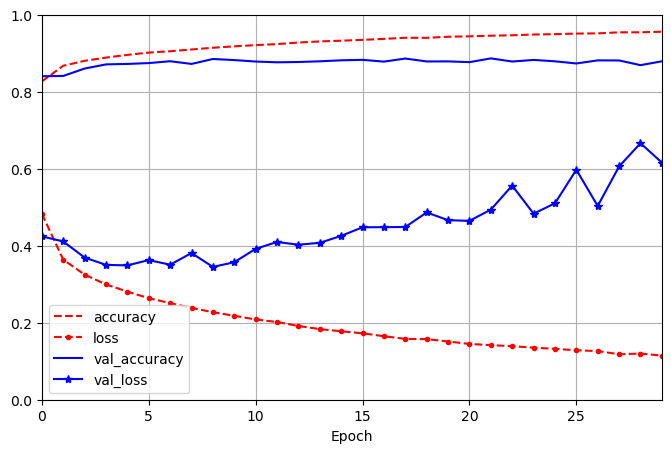

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid= True, xlabel='Epoch',
    style=['r--','r--.','b-','b-*'])
plt.show()

In [68]:
y_proba=model.predict(X_test)
y_pred=y_proba.argmax(axis=-1)
set(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [74]:
tf.random.set_seed(42)
norm_layer=tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model=tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1),
])
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test, rmse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)
y_pred

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - RootMeanSquaredError: 3.1203 - loss: 9.8690 - val_RootMeanSquaredError: 2.9038 - val_loss: 8.4320
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - RootMeanSquaredError: 2.8849 - loss: 8.3225 - val_RootMeanSquaredError: 2.9001 - val_loss: 8.4104
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - RootMeanSquaredError: 2.8793 - loss: 8.2905 - val_RootMeanSquaredError: 2.9005 - val_loss: 8.4128
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - RootMeanSquaredError: 2.8775 - loss: 8.2801 - val_RootMeanSquaredError: 2.8992 - val_loss: 8.4055
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - RootMeanSquaredError: 2.8764 - loss: 8.2736 - val_RootMeanSquaredError: 2.8975 - val_loss: 8.3957
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - RootMeanSquaredError: 2.8755 - loss: 8.2687 - val_RootMeanSquaredError: 2.8954 - val_loss: 8.3832
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - RootMeanSquaredErro

array([[[4.441906 ],
        [4.441906 ],
        [4.441906 ],
        [4.441906 ],
        [4.441906 ],
        [4.441906 ],
        [4.441906 ],
        [4.4477644],
        [4.452988 ],
        [4.453755 ],
        [4.497946 ],
        [4.494534 ],
        [4.505214 ],
        [4.5174336],
        [4.5171247],
        [4.505931 ],
        [4.500253 ],
        [4.5023837],
        [4.5004654],
        [4.5225816],
        [4.5204263],
        [4.5234756],
        [4.441906 ],
        [4.441906 ],
        [4.441906 ],
        [4.441906 ],
        [4.441906 ],
        [4.441906 ]],

       [[4.4284067],
        [4.379226 ],
        [4.379226 ],
        [4.38613  ],
        [4.388136 ],
        [4.4007573],
        [4.341788 ],
        [4.4291863],
        [4.45477  ],
        [4.4300866],
        [4.318622 ],
        [4.37275  ],
        [4.379226 ],
        [4.391405 ],
        [4.393899 ],
        [4.3896008],
        [4.3852186],
        [4.379226 ],
        [4.379226 ],
        [4.

In [75]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 2.8624 - loss: 8.1934


[8.2536039352417, 2.872908353805542]

### California Housing 

In [78]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2)

In [103]:
normalization_layer=tf.keras.layers.Normalization()
hidden_layer1=tf.keras.layers.Dense(30,activation='relu')
hidden_layer2=tf.keras.layers.Dense(30,activation='relu')
concat_layer=tf.keras.layers.Concatenate()
output_layer=tf.keras.layers.Dense(6)

input_=tf.keras.layers.Input(shape=X_train.shape[1:])
normalized=normalization_layer(input_)
hidden1=hidden_layer1(normalized)
hidden2=hidden_layer2(normalized)
concat=concat_layer([normalized,hidden2])
output=output_layer(concat)

model=tf.keras.Model(inputs=[input_],outputs=[output])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.evaluate(X_test,y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0021 - loss: 8.9083    


[8.639761924743652, 0.0019379844889044762]

In [87]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12940,5.6864,21.0,7.677778,1.008333,902.0,2.505556,38.64,-121.25
4265,1.7306,28.0,2.837097,1.154839,1463.0,2.359677,34.10,-118.32
20035,1.6103,44.0,4.822835,1.131890,1330.0,2.618110,36.07,-119.01
10309,7.4947,4.0,7.311043,1.054346,16122.0,3.106957,33.89,-117.74
10885,4.2708,15.0,5.146302,1.088424,1510.0,2.427653,33.70,-117.92
...,...,...,...,...,...,...,...,...
2954,1.9125,39.0,4.530303,1.128788,366.0,2.772727,35.35,-119.01
19069,4.2237,25.0,5.995227,1.051313,1994.0,2.379475,38.27,-122.45
14756,2.5625,23.0,4.589091,1.069091,5176.0,18.821818,32.56,-116.97
16771,4.8750,30.0,4.206030,1.070352,606.0,3.045226,37.69,-122.47


In [113]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1057,2.3155,14.0,4.290146,1.131387,1215.0,2.217153,39.76,-121.84
15156,6.0226,16.0,6.901554,1.015544,640.0,3.316062,32.98,-117.04
16001,6.0274,36.0,6.207547,1.026954,862.0,2.323450,37.75,-122.45
7639,4.5260,21.0,6.285714,1.025917,4185.0,2.645386,33.80,-118.29
13645,1.4511,46.0,5.230769,1.120879,476.0,5.230769,34.06,-117.32
...,...,...,...,...,...,...,...,...
16165,3.5833,52.0,5.158192,1.071563,1312.0,2.470810,37.77,-122.50
3968,5.1463,35.0,6.257028,1.072289,793.0,3.184739,34.20,-118.58
16750,2.4830,44.0,3.714286,1.040816,339.0,3.459184,37.71,-122.46
6811,3.4375,34.0,4.409002,1.021526,1262.0,2.469667,34.10,-118.07


In [122]:
X_test.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [146]:
normalization_layer_1 = tf.keras.layers.Normalization()
normalization_layer_2 = tf.keras.layers.Normalization()

hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')

concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_deep = tf.keras.layers.Input(shape=[6])
input_wide = tf.keras.layers.Input(shape=[5])

norm_wide = normalization_layer_1(input_wide)
norm_deep = normalization_layer_2(input_deep)

hidden1 = hidden_layer1(norm_deep)
hidden2 = hidden_layer2(hidden1)

concat_deep = concat_layer([norm_wide, hidden2])
output = output_layer(concat_deep)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=output)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 5:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 5:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 5:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

normalization_layer_1.adapt(X_train_wide)
normalization_layer_2.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)

y_pred = model.predict((X_new_wide, X_new_deep))

ValueError: The layer was built with input_shape=(None, 6), but adapt() is being called with data with an incompatible shape, data.shape=(16512, 3)

InvalidIndexError: (slice(None, None, None), slice(None, 5, None))